In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle/Bharat Intern Machine Learning/Task1 Movie Recommendation/

/content/gdrive/My Drive/Kaggle/Bharat Intern Machine Learning/Task1 Movie Recommendation


In [5]:
pwd

'/content/gdrive/My Drive/Kaggle/Bharat Intern Machine Learning/Task1 Movie Recommendation'

In [6]:
#!kaggle datasets download -d juzershakir/tmdb-movies-dataset

In [7]:
!ls

movies_list.pkl  similarity.pkl  tmdb_movies_data.csv


In [8]:
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

In [9]:
!ls

movies_list.pkl  similarity.pkl  tmdb_movies_data.csv


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
reader = pd.read_csv('tmdb_movies_data.csv')

# print the concise summery of the dataset
reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [12]:
reader .head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [13]:
reader.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
reader.shape

(10866, 21)

In [15]:
reader.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [16]:
reader.fillna(0)
print()

In [17]:
sum(reader.duplicated())

1

In [18]:
reader.drop_duplicates(inplace = True)
#afetr removing duplicate value from the dataset
print("Afetr Removing Duplicate Values (Rows,Columns) : ",reader.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (10865, 21)


In [19]:
reader['release_date'] = pd.to_datetime(reader['release_date'])
reader['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [20]:
reader.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",reader.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (10865, 15)


In [21]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",reader[(reader['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",reader[(reader['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


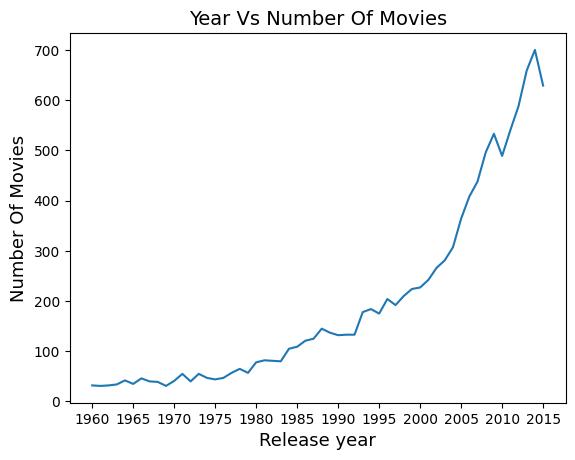

In [22]:
# make group for each year and count the number of movies in each year
data=reader.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
reader.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(8,4)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

In [23]:
#calculate Profit for each of the movie
#add a new column in the dataframe name 'Profit'
reader['Profit'] = reader['revenue'] - reader['budget']

In [24]:
#use the function 'idmin' to find the index of lowest profit movie.
#use the function 'idmax' to find the index of Highest profit movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = reader[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = reader[x].idxmax()
    high = pd.DataFrame(reader.loc[high_index,:])
    low = pd.DataFrame(reader.loc[min_index,:])

    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",reader['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",reader['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


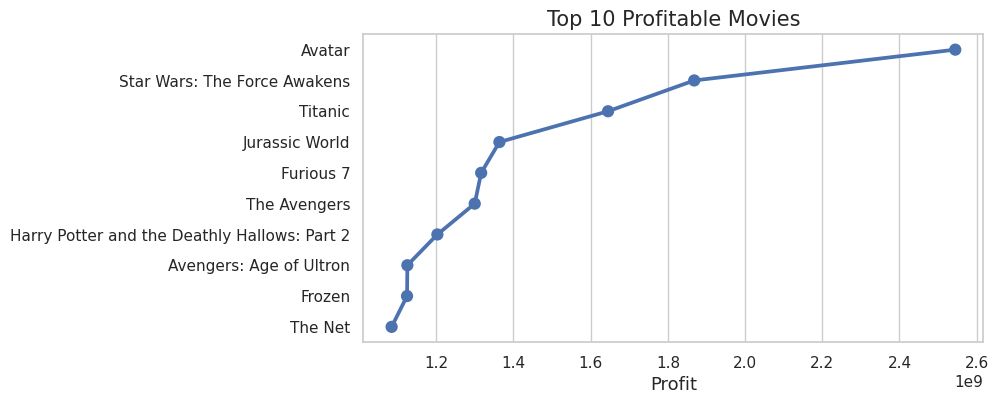

In [25]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(reader['Profit'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

In [26]:
#find the movie with highest and lowest budget.
#use 'find_minmax' function which i made earlier.
#make sure that movie with budget zero didn't affect the result.
#so change the zero into NAN in budget column.
reader['budget'] = reader['budget'].replace(0,np.NAN)
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,425000000.0,1.0
revenue,11087569,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


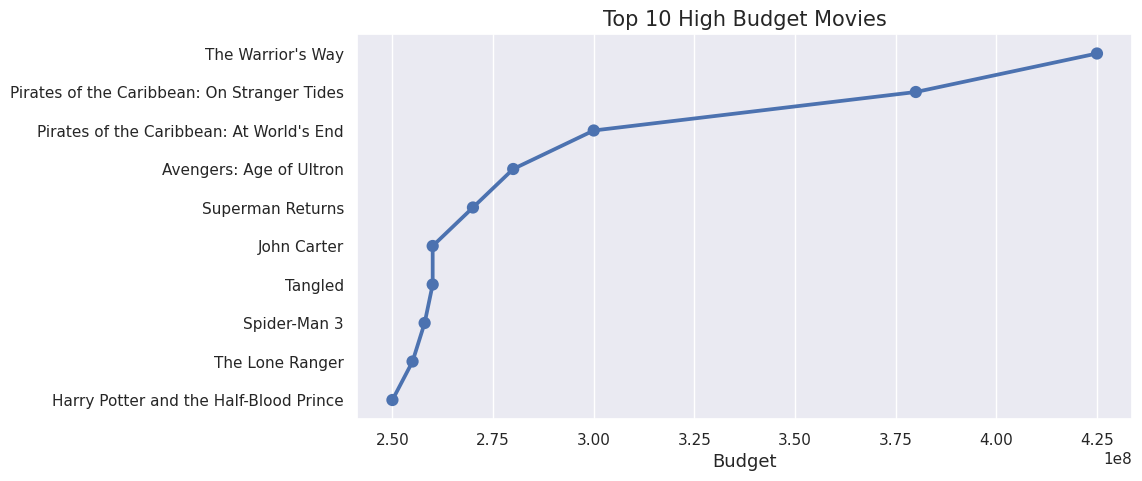

In [27]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['budget'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

In [28]:
#find the movie with highest and lowest earned revenue
#use 'find_minmax' function which i made earlier
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
popularity,9.432768,2.93234
budget,237000000.0,30000000.0
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


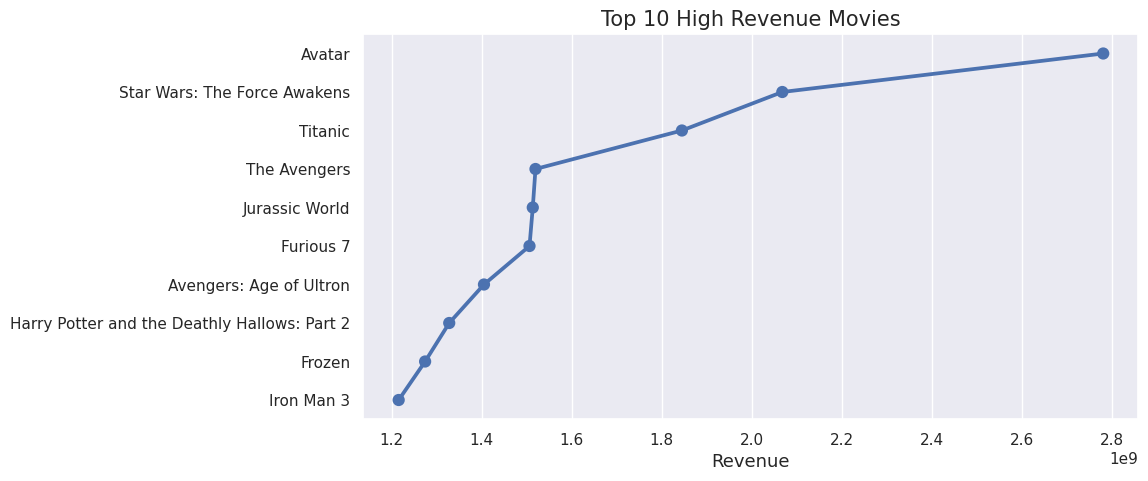

In [29]:
#top 10 movies which made highest revenue.
#sort the 'revenue' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['revenue'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 movies with high revenue data from the list and dataframe.
x = list(data[:10])
y = list(info['revenue'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

In [30]:
#find the movie with longest and shortest runtime.
#use 'find_minmax' function which i made earlier by passsing 'runtime' as argument.
#it can't be possible a movie with zero runtime,but dataset contain some data like this.
#so update zero with NAN in runtime column.
reader['runtime'] = reader['runtime'].replace(0,np.NAN)
find_minmax('runtime')

Movie Which Has Highest runtime :  The Story of Film: An Odyssey
Movie Which Has Lowest runtime  :  Fresh Guacamole


,3894,4883
id,125336,142563
popularity,0.006925,0.078472
budget,NaN,NaN
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,NaN
runtime,900.0,2.0
genres,Documentary,Animation


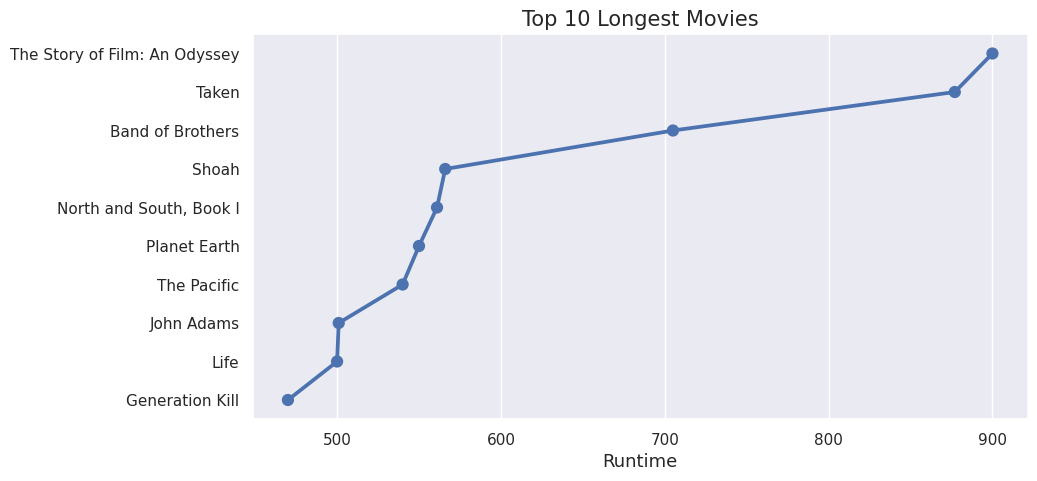

In [31]:
#top 10 Movies With Longest runtime
#sort the 'runtime' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['runtime'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 longest duraton movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

In [32]:
movies = pd.read_csv('tmdb_movies_data.csv')

In [33]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [34]:
movies=movies[['id', 'original_title', 'overview', 'genres']]

In [35]:
movies

,id,original_title,overview,genres
0,135397,Jurassic World,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller
1,76341,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller
2,262500,Insurgent,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller
3,140607,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy
4,168259,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller
...,...,...,...,...
10861,21,The Endless Summer,"The Endless Summer, by Bruce Brown, is one of ...",Documentary
10862,20379,Grand Prix,Grand Prix driver Pete Aron is fired by his te...,Action|Adventure|Drama
10863,39768,Beregis Avtomobilya,An insurance agent who moonlights as a carthie...,Mystery|Comedy
10864,21449,"What's Up, Tiger Lily?","In comic Woody Allen's film debut, he took the...",Action|Comedy


In [36]:
movies['tags']=movies['overview']+movies['genres']

<ipython-input-36-d2a93e8060db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags']=movies['overview']+movies['genres']


In [37]:
movies

,id,original_title,overview,genres,tags
0,135397,Jurassic World,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Twenty-two years after the events of Jurassic ...
1,76341,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,An apocalyptic story set in the furthest reach...
2,262500,Insurgent,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,Beatrice Prior must confront her inner demons ...
3,140607,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,Thirty years after defeating the Galactic Empi...
4,168259,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,Deckard Shaw seeks revenge against Dominic Tor...
...,...,...,...,...,...
10861,21,The Endless Summer,"The Endless Summer, by Bruce Brown, is one of ...",Documentary,"The Endless Summer, by Bruce Brown, is one of ..."
10862,20379,Grand Prix,Grand Prix driver Pete Aron is fired by his te...,Action|Adventure|Drama,Grand Prix driver Pete Aron is fired by his te...
10863,39768,Beregis Avtomobilya,An insurance agent who moonlights as a carthie...,Mystery|Comedy,An insurance agent who moonlights as a carthie...
10864,21449,"What's Up, Tiger Lily?","In comic Woody Allen's film debut, he took the...",Action|Comedy,"In comic Woody Allen's film debut, he took the..."


In [38]:
new_data = movies.drop(columns=['overview','genres'])

In [39]:
new_data

,id,original_title,tags
0,135397,Jurassic World,Twenty-two years after the events of Jurassic ...
1,76341,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...
2,262500,Insurgent,Beatrice Prior must confront her inner demons ...
3,140607,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...
4,168259,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...
...,...,...,...
10861,21,The Endless Summer,"The Endless Summer, by Bruce Brown, is one of ..."
10862,20379,Grand Prix,Grand Prix driver Pete Aron is fired by his te...
10863,39768,Beregis Avtomobilya,An insurance agent who moonlights as a carthie...
10864,21449,"What's Up, Tiger Lily?","In comic Woody Allen's film debut, he took the..."


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
cv = CountVectorizer(max_features=1000, stop_words='english')

In [42]:
cv

CountVectorizer(max_features=1000, stop_words='english')

In [43]:
vector = cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [44]:
vector.shape

(10866, 1000)

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
similarity = cosine_similarity(vector)

In [47]:
similarity

array([[1.        , 0.30237158, 0.3380617 , ..., 0.        , 0.12262787,
        0.        ],
       [0.30237158, 1.        , 0.17888544, ..., 0.        , 0.22710999,
        0.        ],
       [0.3380617 , 0.17888544, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.06131393,
        0.        ],
       [0.12262787, 0.22710999, 0.        , ..., 0.06131393, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [60]:
new_data[new_data['original_title']=="Insurgent"].index[0]

2

In [61]:
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
  print(new_data.iloc[i[0]].original_title)

Insurgent
The Hunger Games: Mockingjay - Part 1
Iron Man
X-Men: The Last Stand
Mad Max Beyond Thunderdome


In [62]:
def recommand(movies):
  index = new_data[new_data['original_title']==movies].index[0]
  distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
  for i in distance [0:5]:
    print(new_data.iloc[i[0]].original_title)

In [63]:
recommand("Batman Begins")

Batman Begins
Tracers
Coogan's Bluff
Dead Man Down
Batman: The Dark Knight Returns, Part 1


In [52]:
import pickle

In [64]:
pickle.dump(new_data, open('movies_list.pkl', 'wb'))

In [65]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [66]:
pickle.load(open('movies_list.pkl', 'rb'))

,id,original_title,tags
0,135397,Jurassic World,Twenty-two years after the events of Jurassic ...
1,76341,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...
2,262500,Insurgent,Beatrice Prior must confront her inner demons ...
3,140607,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...
4,168259,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...
...,...,...,...
10861,21,The Endless Summer,"The Endless Summer, by Bruce Brown, is one of ..."
10862,20379,Grand Prix,Grand Prix driver Pete Aron is fired by his te...
10863,39768,Beregis Avtomobilya,An insurance agent who moonlights as a carthie...
10864,21449,"What's Up, Tiger Lily?","In comic Woody Allen's film debut, he took the..."
